In [1]:

import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("CS98XRegressionTrain.csv")
test = pd.read_csv("CS98XRegressionTest.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [4]:
train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [5]:
train.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [6]:
incomplete_train = train[train.isnull().any(axis=1)].head()
incomplete_train

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29


In [7]:
# drop na in train
train=train.dropna(subset=["top genre"])

In [8]:
incomplete_test = test[test.isnull().any(axis=1)].head()
incomplete_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
66,520,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4


In [9]:
# drop na in test
test=test.dropna(subset=["top genre"])

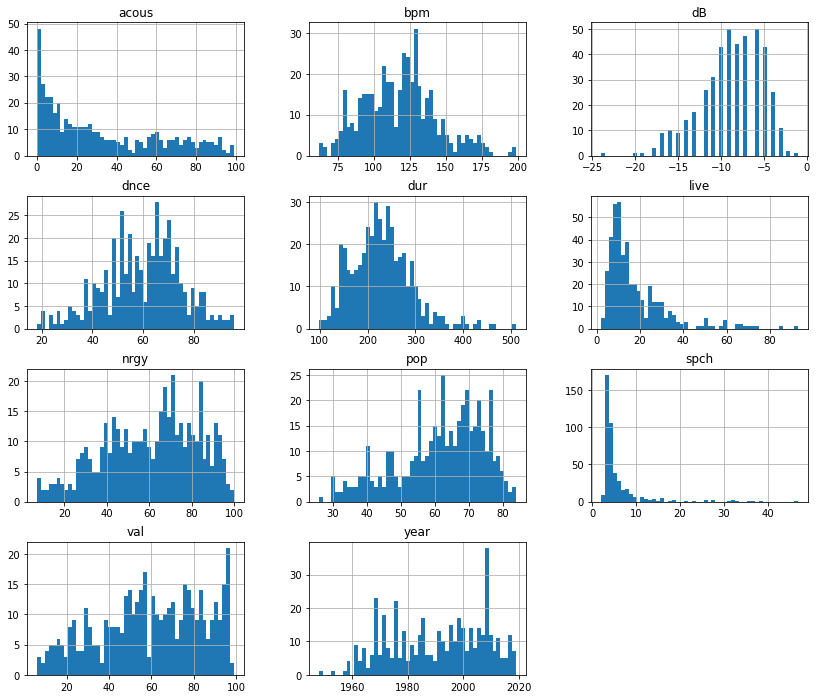

In [10]:

%matplotlib inline
train.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

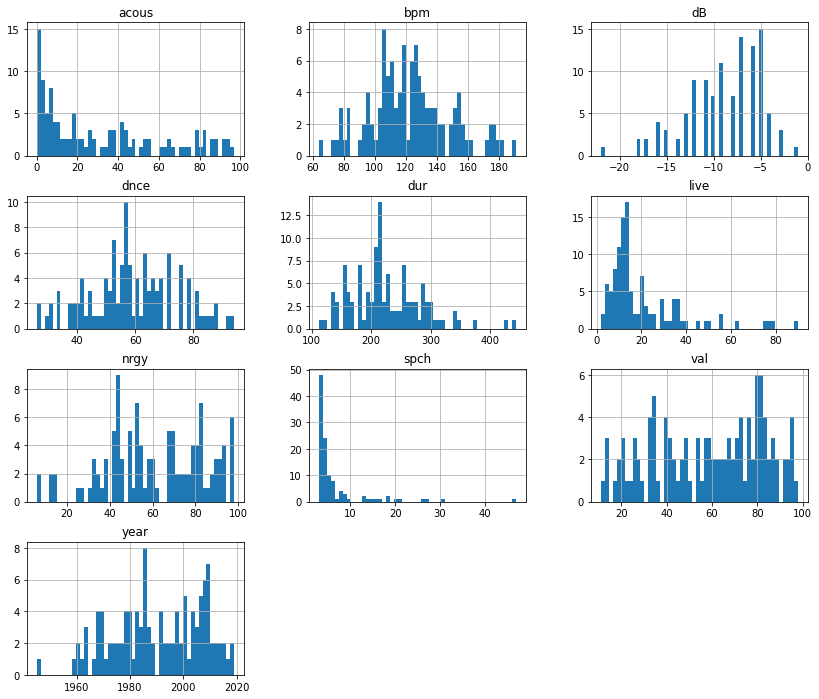

In [11]:
%matplotlib inline
test.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

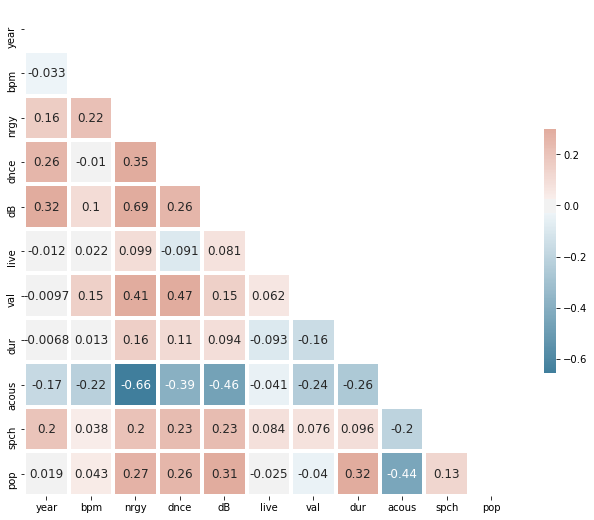

In [12]:

#train set
# Compute the correlation matrix and drop Id
corr = train.drop(['Id'],axis=1).corr()

# Add a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=3, cbar_kws={"shrink": .5},annot = True, annot_kws = {'size': 12})

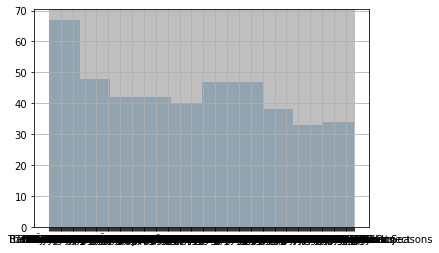

In [13]:
train["artist"].hist()
plt.show()

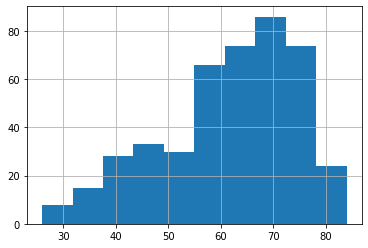

In [14]:
train["pop"].hist()
plt.show()

In [37]:
train_num = train.drop(['title', 'artist'], axis=1)
cat_attribs = ['title', 'artist']
num_attribs = list(train_num)


In [35]:
from sklearn import preprocessing
SC = preprocessing.StandardScaler()
train([ :, 4:13], axis=1) = SC.fit_transform(train[ :, 4:13], axis=1)

train(10)

SyntaxError: invalid syntax (<ipython-input-35-2ca2e9e66bb1>, line 3)

In [38]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
train_num[num_attribs] = std_scaler.fit_transform(train_num[num_attribs])

train_num.head(10)

ValueError: could not convert string to float: 'adult standards'